In [2]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
sns.set() #make the plots look pretty
from bs4 import BeautifulSoup

# To be fixed : doubles codes postaux et valeurs NaN dans income

# Import the data
### candidates
First we create a dataframe  **`candidates`**  with the list of candidates

In [3]:
f = io.open('data/list_candidates.xml', encoding='utf-8')
soup = BeautifulSoup(f, features='xml')
cand_list = soup.find_all('Candidat')
candidates = []

for c in cand_list:
    temp_dict = {}
    temp_dict['cand_id'] = c.find_all('NumPanneauCand')[0].text
    temp_dict['last_name'] = c.find_all('NomPsn')[0].text
    temp_dict['first_name'] = c.find_all('PrenomPsn')[0].text
    temp_dict['civilite'] = c.find_all('CivilitePsn')[0].text
    candidates.append(temp_dict)
f.close()
candidates = pd.DataFrame(candidates)

### election results
We then build the dataframe  **`results`**  containing all the elections results

In [4]:
with io.open('data/results_pres_election.txt', encoding='iso-8859-1') as f:
    line = f.readline()
    
header = ['dpt_code','dpt_name','circo_code','circo_name','city_code','city_name','poll_station',
          'registered','abst','abst_perc','voting','voting_perc','white','white_perc_ins','white_perc_vot',
          'nullv', 'nullv_perc_ins', 'nullv_perc_vot','valid','valid_perc_ins','valid_perc_vot'
         ]

def pattern(i):
    tmp = ['cand_id','sex','last_name','first_name','votes','perc_ins','perc_exp']
    for j in range(len(tmp)):
        tmp[j] = str(i) + '_' + tmp[j]
    return tmp

for i in range(1,len(candidates)+1):
    header.extend(pattern(i))

In [5]:
results = pd.read_csv('data/results_pres_election.txt', sep=';',  encoding='iso-8859-1', header=0, names = header, dtype={'dpt_code': 'str', 'city_code':'str'})

/Users/aurelien/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


We create a smaller dataframe  **`df`**  with the interesting columns

In [63]:
colums_to_keep = results.columns[[list(range(0,9)) + [10] + [12] + [15] + [18] + list(range(25,98,7))]]
df = results[colums_to_keep]

In [64]:
df[:10]

,dpt_code,dpt_name,circo_code,circo_name,city_code,city_name,poll_station,registered,abst,voting,...,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,11_votes
0,01,Ain,4,4ème circonscription,001,L'Abergement-Clémenciat,1,598,92,506,...,126,119,29,4,4,2,2,59,6,110
1,01,Ain,5,5ème circonscription,002,L'Abergement-de-Varey,1,209,25,184,...,48,37,13,2,2,0,0,33,1,34
2,01,Ain,5,5ème circonscription,004,Ambérieu-en-Bugey,1,1116,233,883,...,233,156,47,6,15,0,6,216,7,116
3,01,Ain,5,5ème circonscription,004,Ambérieu-en-Bugey,2,1128,256,872,...,234,183,51,5,16,1,8,175,11,124
4,01,Ain,5,5ème circonscription,004,Ambérieu-en-Bugey,3,1116,227,889,...,218,191,53,4,12,0,11,182,7,149
5,01,Ain,5,5ème circonscription,004,Ambérieu-en-Bugey,4,1007,220,787,...,211,152,31,3,10,2,7,171,9,124
6,01,Ain,5,5ème circonscription,004,Ambérieu-en-Bugey,5,1050,302,748,...,183,133,43,11,13,0,6,192,11,99
7,01,Ain,5,5ème circonscription,004,Ambérieu-en-Bugey,6,1108,262,846,...,196,183,45,4,8,1,8,170,17,151
8,01,Ain,5,5ème circonscription,004,Ambérieu-en-Bugey,7,1042,263,779,...,177,163,37,3,10,1,4,148,7,182
9,01,Ain,5,5ème circonscription,004,Ambérieu-en-Bugey,8,1019,199,820,...,215,171,37,4,7,0,10,158,2,139


### income data

we create a dataframe  **`income`**  with income data by city

In [8]:
income = pd.read_excel('data/income_by_city.xls', skiprows=4)
income_dict = {}
for col in income.columns.values:
    income_dict[income[col][0]] = col
income = pd.read_excel('data/income_by_city.xls', skiprows=5)

In [9]:
income.head(2)

,CODGEO,LIBGEO,NBMENFISC13,NBPERSMENFISC13,MED13,PIMP13,TP6013,TP60AGE113,TP60AGE213,TP60AGE313,...,PPEN13,PPAT13,PPSOC13,PPFAM13,PPMINI13,PPLOGT13,PIMPOT13,RD13,D113,D913
0,01001,L'Abergement-Clémenciat,297.0,768.0,22130.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01002,L'Abergement-de-Varey,99.0,239.0,23213.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
sum(income['MED13'].isnull()) / len(income['MED13'].isnull())

0.099628273109932761

### table from insee code to zipcode

In [11]:
insee_to_zip = pd.read_csv('data/insee_to_zipcode.csv', sep=';', dtype='str')
insee_to_zip.head(3)

,insee_com,postal_code,nom_comm,nom_dept,nom_region,statut,z_moyen,superficie,population,geo_point_2d,geo_shape,id_geofla,code_comm,code_cant,code_arr,code_dept,code_reg
0,32460,32720,VERGOIGNAN,GERS,MIDI-PYRENEES,Commune simple,126.0,1056.0,0.3,"43.7235746425, -0.188266221507","{""type"": ""Polygon"", ""coordinates"": [[[-0.19884...",34962,460,24,3,32,73
1,51141,51240,LA CHAUSSEE-SUR-MARNE,MARNE,CHAMPAGNE-ARDENNE,Commune simple,130.0,2240.0,0.7,"48.8433156105, 4.54286173009","{""type"": ""Polygon"", ""coordinates"": [[[4.504753...",18178,141,33,4,51,21
2,77130,77580,COULOMMES,SEINE-ET-MARNE,ILE-DE-FRANCE,Commune simple,136.0,371.0,0.4,"48.8919104938, 2.92942534432","{""type"": ""Polygon"", ""coordinates"": [[[2.940606...",31737,130,08,1,77,11


# Cleaning the data

In [65]:
sorted(list(set(df['dpt_code'].values)))[-7:]
results_abroad_idx = df['dpt_code'].isin(sorted(list(set(df['dpt_code'].values)))[-7:])
results_abroad = df[results_abroad_idx]
df = df[~results_abroad_idx]

In [66]:
results_abroad_idx = df['dpt_code'].isin(sorted(list(set(df['dpt_code'].values)))[-7:])

In [67]:
df['dpt_code'].replace('Z.',u'97', regex=True, inplace=True)
temp = df['dpt_code'] + df['city_code']
df.loc[:,'insee_code'] = temp
df = pd.merge(df, insee_to_zip[['insee_com','postal_code']], how='left', left_on='insee_code', right_on='insee_com')

List of insee codes which map to several zip code (will have to be fixed)

In [68]:
list(set(df[df['postal_code'].str.len() > 5]['postal_code']))

['93200/93210',
 '15000/15250',
 '60113/60190',
 '07310/07320',
 '72000/72100',
 '31000/31100/31200/31300/31400/31500',
 '87000/87100/87280',
 '42000/42100/42230',
 '06600/06160',
 '59140/59240/59430/59640/59279',
 '67000/67100/67200',
 '66000/66100',
 '68630/68126',
 '37000/37100/37200',
 '83000/83100/83200',
 '38000/38100',
 '50100/50130',
 '76000/76100',
 '06130/06520',
 '44000/44100/44200/44300',
 '39310/01410',
 '83700/83530',
 '95000/95800',
 '13080/13090/13100/13290/13540',
 '06400/06150',
 '49000/49100',
 '45000/45100',
 '76600/76610/76620',
 '65200/65710',
 '33000/33100/33200/33300/33800',
 '57000/57050/57070',
 '97139/97142',
 '83600/83370',
 '59000/59160/59260/59777/59800',
 '59491/59493/59650',
 '34000/34070/34080/34090',
 '30000/30900',
 '68100/68200',
 '94100/94210',
 '64122/64700',
 '67130/67570',
 '35000/35200/35700',
 '20200/20600',
 '92190/92360',
 '95000/95300',
 '20251/20270',
 '97200/97234',
 '06000/06100/06200/06300',
 '63000/63100']

In [16]:
df[df['city_code'].str.len() != 3]

,dpt_code,dpt_name,circo_code,circo_name,city_code,city_name,poll_station,registered,abst,voting,...,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,11_votes,insee_code,insee_com,postal_code


# Groupby test

In [17]:
f = {'dpt_name': lambda x: list(set(x))[0], 
     'registered':['sum'], 'abst':['sum'], 'voting':['sum'], 'white':['sum'], 
     'nullv':['sum'], 'valid':['sum'], '1_votes':['sum'], '2_votes':['sum'], '3_votes':['sum'], 
     '4_votes':['sum'], '5_votes':['sum'], '6_votes':['sum'], '7_votes':['sum'], '8_votes':['sum'], 
     '9_votes':['sum'], '10_votes':['sum'], '11_votes':['sum']}

In [18]:
votes_by_dpt = df.groupby('dpt_code').agg(f)

In [19]:
votes_by_dpt.head(3)

,dpt_name,registered,abst,voting,white,nullv,valid,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,11_votes
,<lambda>,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum
dpt_code,,,,,,,,,,,,,,,,,,
01,Ain,415886,81507,334379,6342,2238,325799,19788,81455,73692,16711,1842,3098,595,3465,51736,3612,69805
02,Aisne,375752,80183,295569,5047,2382,288140,14651,102770,51680,12230,2763,3156,536,2264,48950,2171,46969
03,Allier,253508,54275,199233,4335,2438,192460,9795,43004,45651,10619,1540,2322,353,2986,38311,1422,36457


In [20]:
df['insee_code'].head()

0    01001
1    01002
2    01004
3    01004
4    01004
Name: insee_code, dtype: object

In [21]:
df.columns

Index(['dpt_code', 'dpt_name', 'circo_code', 'circo_name', 'city_code',
       'city_name', 'poll_station', 'registered', 'abst', 'voting', 'white',
       'nullv', 'valid', '1_votes', '2_votes', '3_votes', '4_votes', '5_votes',
       '6_votes', '7_votes', '8_votes', '9_votes', '10_votes', '11_votes',
       'insee_code', 'insee_com', 'postal_code'],
      dtype='object')

In [22]:
df[['insee_code','registered', 'abst', 'voting', 'white',
       'nullv', 'valid', '1_votes', '2_votes', '3_votes', '4_votes', '5_votes',
       '6_votes', '7_votes', '8_votes', '9_votes', '10_votes', '11_votes']][:5]

,insee_code,registered,abst,voting,white,nullv,valid,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,11_votes
0,01001,598,92,506,2,9,495,34,126,119,29,4,4,2,2,59,6,110
1,01002,209,25,184,6,2,176,6,48,37,13,2,2,0,0,33,1,34
2,01004,1116,233,883,17,6,860,58,233,156,47,6,15,0,6,216,7,116
3,01004,1128,256,872,19,3,850,42,234,183,51,5,16,1,8,175,11,124
4,01004,1116,227,889,11,4,874,47,218,191,53,4,12,0,11,182,7,149


In [69]:
votes_by_insee_code = df.groupby('insee_code').agg(sum).reset_index()

In [70]:
votes_by_insee_code = pd.merge(votes_by_insee_code, income[['CODGEO','MED13']], how='left', left_on='insee_code', right_on='CODGEO')

In [71]:
votes_by_insee_code.dropna(axis=0, how='all',subset=['MED13'], inplace=True)

In [26]:
income_limits = pd.to_numeric(votes_by_insee_code['MED13']).quantile([0.2,0.4,0.6,0.8])

In [72]:
votes_by_insee_code['income_cat'] = pd.qcut(votes_by_insee_code['MED13'].values, 10).codes + 1

In [73]:
pd.qcut(votes_by_insee_code['MED13'].values, 10).categories

IntervalIndex([(10021.249, 17252.583], (17252.583, 18125.0], (18125.0, 18748.6], (18748.6, 19299.212], (19299.212, 19860.495], (19860.495, 20450.0], (20450.0, 21156.078], (21156.078, 22119.923], (22119.923, 23696.56], (23696.56, 46250.556]]
              closed='right',
              dtype='interval[float64]')

In [74]:
votes_by_income = votes_by_insee_code.groupby('income_cat').agg(sum)

In [75]:
votes_by_income

,circo_code,registered,abst,voting,white,nullv,valid,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,11_votes,MED13
income_cat,,,,,,,,,,,,,,,,,,,
1,31707,4646291,1230762,3415529,62112,30828,3322589,129849,851463,653790,211114,26516,40193,6022,41364,832303,37122,492853,5.164247e+07
2,27487,4571475,1072048,3499427,63212,27851,3408364,149069,836632,720300,207801,25366,39945,6360,43818,752702,32436,593935,5.634810e+07
3,22493,4151275,900907,3250368,59638,26840,3163890,150081,745383,702402,198391,23910,39229,5924,44079,635083,28528,590880,5.857663e+07
4,23173,4225814,872486,3353328,61292,25293,3266743,154743,739030,742391,209988,23089,38956,5974,43731,666017,29020,613804,6.043984e+07
5,20445,3409519,657431,2752088,52226,21918,2677944,138792,639432,600314,160834,19821,33371,4840,38856,522517,22421,496746,6.218719e+07
6,23635,3819834,730267,3089567,56000,22517,3011050,151987,680568,699883,195992,20279,36145,5446,41751,600036,25410,553553,6.403177e+07
7,21879,3724797,682252,3042545,54830,21507,2966208,153786,662446,703007,186581,18667,33755,5299,37608,566204,25745,573110,6.604861e+07
8,25728,4216225,760796,3455429,61214,22666,3371549,177247,723635,825069,208823,20006,36648,6121,43503,634471,29871,666155,6.864170e+07
9,27329,4192875,730030,3462845,59833,22653,3380359,183796,712007,852295,206573,18289,33028,6006,38253,607212,29598,693302,7.244157e+07


In [76]:
votes_by_income = votes_by_income.iloc[:,7:-1].div(votes_by_income['voting'], axis='index') 

In [32]:
candidates['full_name'] = candidates['civilite'] + ' ' + candidates['first_name'] + ' ' + candidates['last_name']

In [34]:
cand_list = list(candidates['full_name'][[1,2,8,10]].values)

In [35]:
votes_by_income.iloc[:,[1,2,8,10]].columns = cand_list

In [42]:
df = votes_by_income.iloc[:,[1,2,8,10]]

In [43]:
df.columns = cand_list

In [44]:
df

,Mme Marine LE PEN,M. Emmanuel MACRON,M. Jean-Luc MÉLENCHON,M. François FILLON
income_cat,,,,
1,0.244122,0.198713,0.229214,0.157165
2,0.224785,0.218786,0.197026,0.182426
3,0.225963,0.222573,0.192164,0.179795
4,0.213310,0.235162,0.184777,0.190716
5,0.162000,0.271599,0.164343,0.239318


In [51]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


/Users/aurelien/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


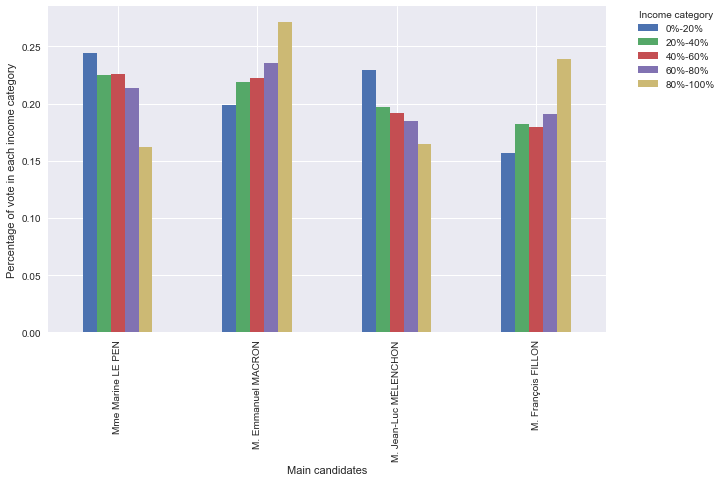

In [52]:
df.T.plot(kind='bar')
plt.xlabel('Main candidates')
plt.ylabel('Percentage of vote in each income category')

plt.legend(title = 'Income category', 
           labels=[
               '0%-20%',
               '20%-40%',
               '40%-60%',
               '60%-80%',
               '80%-100%'], 
           bbox_to_anchor=(1.05, 1), 
           loc=2, 
           borderaxespad=0.)

plt.show()

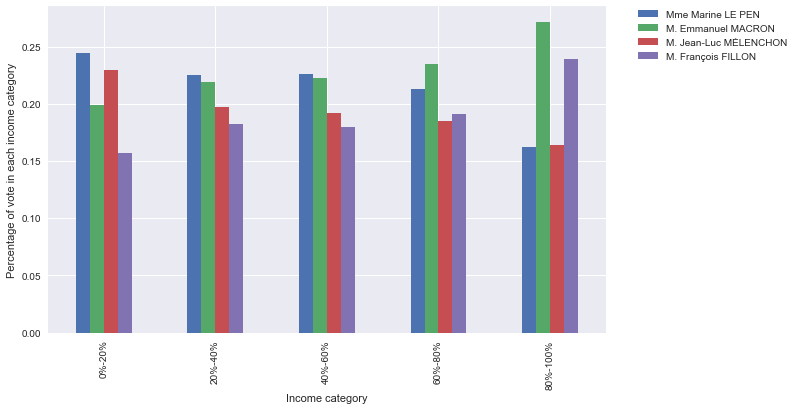

In [61]:
df.plot(kind='bar')
plt.xlabel('Income category')
plt.ylabel('Percentage of vote in each income category')

plt.legend( 
           bbox_to_anchor=(1.05, 1), 
           loc=2, 
           borderaxespad=0.)
plt.xticks(arange(5),['0%-20%','20%-40%','40%-60%','60%-80%','80%-100%'])
plt.show()

In [79]:
df = votes_by_income['3_votes']

In [80]:
df

income_cat
1     0.191417
2     0.205834
3     0.216099
4     0.221389
5     0.218130
6     0.226531
7     0.231059
8     0.238775
9     0.246126
10    0.286156
Name: 3_votes, dtype: float64

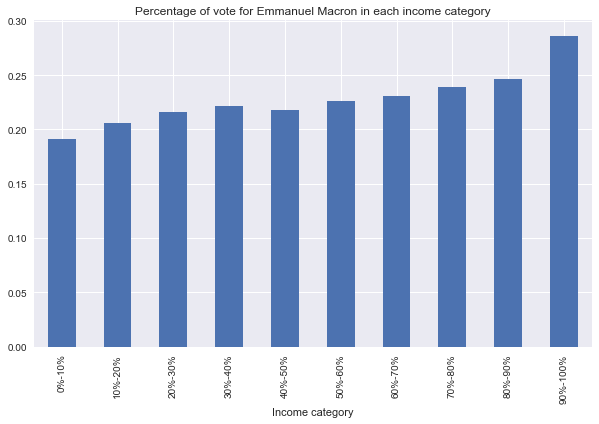

In [85]:
df.T.plot(kind='bar')
plt.xlabel('Income category')
plt.title('Percentage of vote for Emmanuel Macron in each income category')


plt.xticks(arange(10),['0%-10%','10%-20%','20%-30%','30%-40%','40%-50%','50%-60%','60%-70%','70%-80%','80%-90%','90%-100%'])
plt.show()